## Creation of demo model (sphere in cube model)

### A model identical to this can be rapidly created via the Acto3D menu bar: File > Demo Model.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
imgsize = 768

cube_size = 700/2
sphere_size = 512/2

cube_color = 200
sphere_color = 128

In [3]:
def create_mask(z):
    mask = np.full((imgsize, imgsize), 0, dtype=np.uint8)  
    
    center_x, center_y = imgsize // 2, imgsize // 2

    for y in range(imgsize):
        for x in range(imgsize):
            # 
            
            if((x - center_x) < -4 and (y - center_y) < -4 and np.abs(z) < cube_size):
                if( (x - center_x) ** 2 + (y - center_y) ** 2 + z**2 <= sphere_size**2):
                    mask[y, x] = sphere_color
                elif np.abs(x - center_x) < cube_size and np.abs(y - center_y) < cube_size and z < cube_size:
                    mask[y, x] = cube_color
                else:
                    mask[y, x] = 0
                    
    return mask

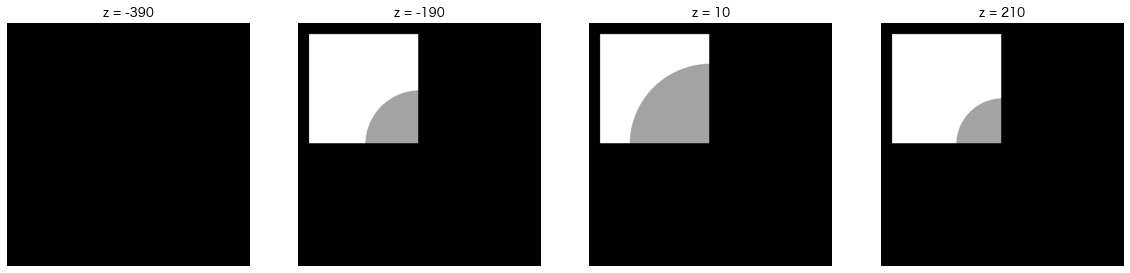

In [4]:
z_values = range(-390, 390, 200) 
section_masks = [create_mask(z) for z in z_values]

# Display the masks
fig, axes = plt.subplots(1, len(section_masks), figsize=(20, 20))
for ax, mask, z_value in zip(axes, section_masks, z_values):
    ax.imshow(mask, cmap='gray')
    ax.axis('off')
    ax.set_title(f"z = {z_value}")
plt.show()

In [5]:
import os
from tqdm import tqdm

os.makedirs('./output_sphere_in_cube_ch1', exist_ok=True)
os.makedirs('./output_sphere_in_cube_ch1_blur', exist_ok=True)

z_values = range(-390, 390, 1)  

for index, z_value in enumerate(tqdm(z_values, desc="Generating sphere in cube model section")):
    mask = create_mask(z_value)
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(mask, (7, 7), 0)
    
    cv2.imwrite(f'./output_sphere_in_cube_ch1/z{str(index).zfill(4)}.tif', mask)
    cv2.imwrite(f'./output_sphere_in_cube_ch1_blur/z{str(index).zfill(4)}.tif', blurred_image)

Generating sphere in cube model section: 100%|██████████| 780/780 [06:46<00:00,  1.92it/s]


Please rotate this image by 90 degrees incrementally and composite it using ImageJ / FIJI.